# Week4 - Homework 2

- Execute the below code, then answer the numbered questions.
- You can create additinal code and markdown blocks

In [2]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/regression/airbnb_nyc_2019.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

## Question 1:
### Which features can we use?

In [4]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Features to exclude:

- id can be removed as it is an identifier
- host_id can be removed since it is an identifier
- host_name can be removed a person is very less likely to buy a house from a particular host.
- last_review can be removed

Your explanation?

In [7]:
from sklearn.model_selection import train_test_split
features = [
    'name',
    'neighbourhood_group',
    'neighbourhood',
    'latitude',
    'longitude',
    'room_type',
    'price',
    'minimum_nights',
    'number_of_reviews',
    'reviews_per_month',
    'calculated_host_listings_count',
    'availability_365'
]

X = df[features]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

print(f'Records in training data: {X_train.shape[0]:,}')
print(f'Records in test data: {X_test.shape[0]:,}')
print('\nFeatures:')
print(*X_train.columns, sep='\n')

Records in training data: 39,116
Records in test data: 9,779

Features:
name
neighbourhood_group
neighbourhood
latitude
longitude
room_type
price
minimum_nights
number_of_reviews
reviews_per_month
calculated_host_listings_count
availability_365


## Question 2: 
Split the features into two lists, one for the numerical features and another for the categorical features.

In [9]:
# numerical features
numerical_features = [
    'latitude',
    'longitude',
    'price',
    'minimum_nights',
    'number_of_reviews',
    'reviews_per_month',
    'calculated_host_listings_count',
    'availability_365'
]

# categorical features
categorical_features = [
    'name',
    'neighbourhood_group',
    'neighbourhood',
    'room_type'
]

## Question 3: 
 Using the numerical variables, create a pipeline that replaces the missing values with the median and then standardizes the values using a standard scaler.

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# pipeline for numerical features
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # replace missing values with the median
    ('scaler', StandardScaler())                    # standardize the values
])

# fit and transform the numerical data
X_numerical_transformed = numerical_pipeline.fit_transform(X[numerical_features])

# convert the result back to a DataFrame
X_numerical_transformed_df = pd.DataFrame(X_numerical_transformed, columns=numerical_features)

# display the transformed DataFrame
X_numerical_transformed_df.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,-1.493849,-0.437652,-0.015493,-0.293996,-0.320414,-0.676551,-0.034716,1.916250
1,0.452436,-0.684639,0.300974,-0.293996,0.487665,-0.564771,-0.156104,1.840275
2,1.468399,0.222497,-0.011329,-0.196484,-0.522433,-0.341211,-0.186451,1.916250
3,-0.803398,-0.164450,-0.265335,-0.293996,5.538156,2.236302,-0.186451,0.617065
4,1.275660,0.177216,-0.302811,0.144807,-0.320414,-0.748879,-0.186451,-0.856865


## Question 4: 
Using the categorical variables, create a pipeline that replaces the missing values with the most frequent and then use one-hot encoding to convert the data to numerical arrays.
- You should be dropping one category from each variable when using the one-hot encoder.  
- To ensure the pipeline doesn't break when it receives new/unexpected categories, you should ignore new categories.
- Use a fit transformer on the training dataset to validate all the columns are now numeric and to determine how many columns the transformed data contains.

In [13]:
# importing the required libraries
from sklearn.preprocessing import OneHotEncoder

# pipeline for categorical features
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # replace missing values with mode
    ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore'))  # one-hot encode with drop-first and ignore unknown categories
])

# fit and transform the pipeline on the training data
X_categorical_transformed = categorical_pipeline.fit_transform(X_train[categorical_features])

# convert the transformed data to a DataFrame to inspect the result
# converting the sparse matrix to dense matrix
X_categorical_transformed_df = pd.DataFrame(X_categorical_transformed.toarray(), 
                                            columns=categorical_pipeline.named_steps['encoder'].get_feature_names_out(categorical_features))

# print the transformed DataFrame
print(X_categorical_transformed_df)

# print the number of columns in the transformed data
print(f"Number of columns after transformation: {X_categorical_transformed_df.shape[1]}")

       name_ 2-3 bedroom UWS garden triplex   \
0                                        0.0   
1                                        0.0   
2                                        0.0   
3                                        0.0   
4                                        0.0   
...                                      ...   
39111                                    0.0   
39112                                    0.0   
39113                                    0.0   
39114                                    0.0   
39115                                    0.0   

       name_ 3 bedroom loft in Williamsburg  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   
...                                     ...   
39111                                   0.0   
39112                                   0.0   


## Question 5: 

Combine the numerical and categorical pipelines into one data processing pipeline.
- Use a fit transformers and the training dataset to verify the data has no missing values and the correct number of columns.

In [15]:
# importing the required libraries
from sklearn.compose import ColumnTransformer

# combine numerical and categorical pipelines into one ColumnTransformer
full_pipeline = ColumnTransformer(transformers=[
    ('num', numerical_pipeline, numerical_features),  # apply numerical pipeline to numerical features
    ('cat', categorical_pipeline, categorical_features)  # apply categorical pipeline to categorical features
])

# fit and transform the training data
X_train_transformed = full_pipeline.fit_transform(X_train)

# convert the transformed data to a DataFrame to inspect the result
X_train_transformed_df = pd.DataFrame(X_train_transformed.toarray() if hasattr(X_train_transformed, 'toarray') else X_train_transformed)

# print the transformed DataFrame to verify no missing values and correct number of columns
print(X_train_transformed_df)

# print the number of columns in the transformed data
print(f"Number of columns after transformation: {X_train_transformed_df.shape[1]}")

          0         1         2         3         4         5         6      \
0      0.059054 -1.104861  0.330638 -0.103563 -0.409297 -0.697687 -0.186554   
1     -0.043823  0.250603 -0.117445 -0.206608 -0.431889 -0.625440 -0.186554   
2      0.929024 -0.117262 -0.159322 -0.258130  0.449174  1.633919 -0.186554   
3     -0.755717  0.870769 -0.477586 -0.258130 -0.499663 -0.750230 -0.186554   
4     -0.832188  0.042802 -0.217950 -0.000518 -0.431889 -0.737094 -0.186554   
...         ...       ...       ...       ...       ...       ...       ...   
39111  0.582797 -1.007656  0.196632 -0.309653 -0.499663 -0.789637 -0.186554   
39112  0.225016 -1.076347 -0.012753 -0.206608  3.250499  0.274363 -0.186554   
39113  1.239125  0.396410 -0.389645 -0.258130  2.550168  1.207006 -0.095725   
39114  1.351906 -0.278622 -0.389645  0.411663 -0.522254 -0.343020 -0.186554   
39115 -0.867581  0.826055 -0.410583 -0.258130 -0.409297  0.307203  0.085934   

          7      8      9      ...  38651  38652  3

## Question 6: 

Add a linear regression model to the pipeline.
- Report what the $R^2$ is using the `test` data.  

In [17]:
# importing the required libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# create a final pipeline by adding a linear regression model
final_pipeline = Pipeline(steps=[
    ('preprocessor', full_pipeline),
    ('regressor', LinearRegression())  # Add Linear Regression model
])

# fit the pipeline on the training data
final_pipeline.fit(X_train, y_train)

# predict on the test data
y_pred = final_pipeline.predict(X_test)

# calculate R^2 score
r2 = r2_score(y_test, y_pred)

# output the R^2 score
print(f"R^2 score on the test data: {r2}")

R^2 score on the test data: 0.9999999992020185


/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [0, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


> It seems like the linear regression model is perfetly fitting the data

## Question 7: 

Create a plot(s) of the residuals. Do you have any concerns about patterns in the residuals that the model is neglecting to pick-up?
- Include a sentence or two on what you observe.

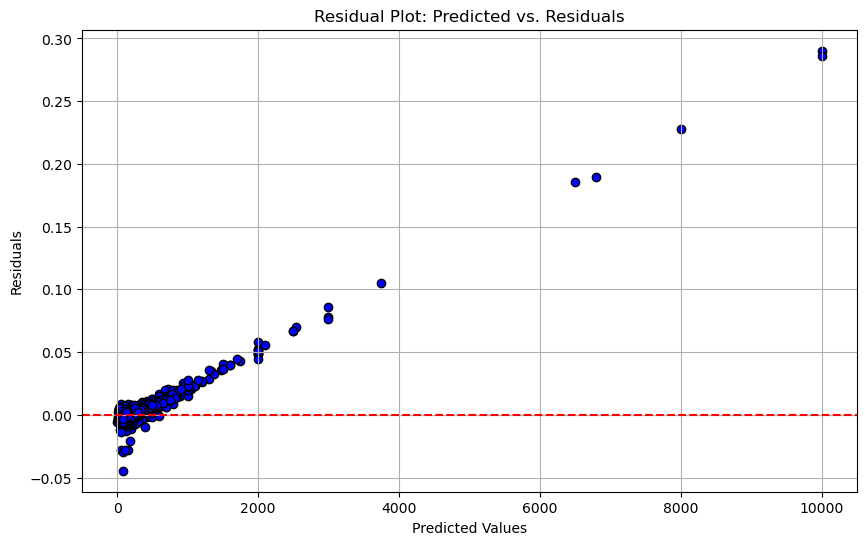

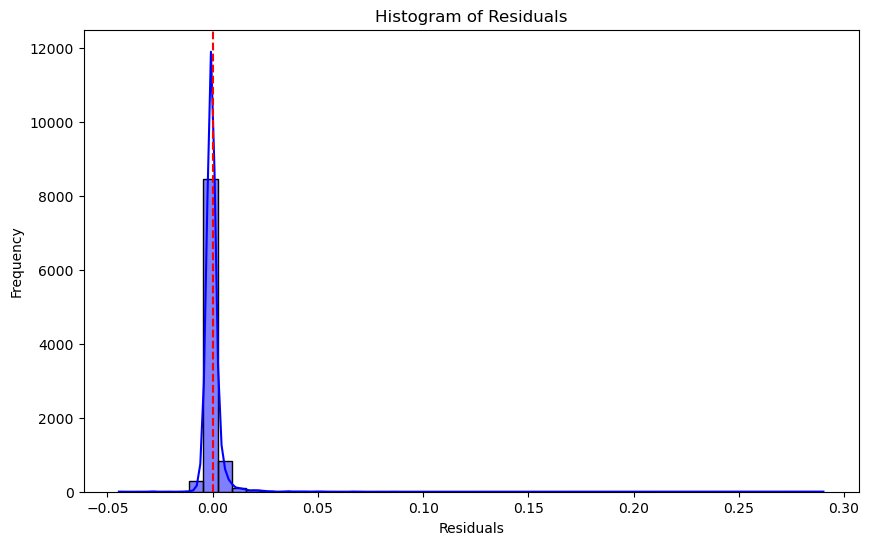

In [20]:
# importing the required libraries
import matplotlib.pyplot as plt
import seaborn as sns

# calculate the residuals
residuals = y_test - y_pred

# create a scatter plot of residuals vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='blue', edgecolor='k')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot: Predicted vs. Residuals')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

# create a histogram of the residuals to check their distribution
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=50, kde=True, color='blue')
plt.axvline(x=0, color='red', linestyle='--')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


>- The first plot shows that the difference between the predicted values and actual values tends to increase as the predictions get larger, which could suggest some issues with the model, like unequal variance in the errors.
>- The second plot, a histogram of the residuals, shows that most of the errors are clustered around zero, meaning the model is generally accurate, but there are a few larger errors on the positive side.

## Question 8: 

Modify the pipeline to use a ridge regression model with an alpha value of 100. How does this change the $R^2$?

In [23]:
# importing the required libraries
from sklearn.linear_model import Ridge

# modifying the pipeline to use ridge regression with alpha=100
ridge_pipeline = Pipeline(steps=[
    ('preprocessor', full_pipeline),
    ('regressor', Ridge(alpha=100))
])

# fit the pipeline on the training data
ridge_pipeline.fit(X_train, y_train)

# predict on the test data
y_pred_ridge = ridge_pipeline.predict(X_test)

# calculate the R^2 score for the Ridge model
r2_ridge = r2_score(y_test, y_pred_ridge)

# output the R^2 score for Ridge regression
print(f"R^2 score with Ridge regression (alpha=100): {r2_ridge}")

R^2 score with Ridge regression (alpha=100): 0.9999922933216079


/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [0, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


> The R2 score with Ridge regression (alpha=100) is still extremely high at 0.99999, meaning the model fits the data almost perfectly, even with regularization.